# Quantum Computing

Quantum computing is an application of quantum mechanics that uses quantum superposition and entanglement to perform computations on data.

Certain types of problems can be solved more quickly than in traditional computers that use transistors and electrons.

While classical computers store data in bits, either 1 or 0, represented by on or off, quantum computers use qubits, which can be 1 or 0, or a hybrid of both known as the "superposition."

Unlike classical computers, qubits can be entangled, influencing each other's state, and can be entangled over large distances; this can reduce the complexity of certain problem types, making quantum computers faster than classical computers.

***
## Flipping a coin

Due to their reliance on quantum phenomena, quantum computers are not deterministic but rather probablistic in nature.

In classical computers, a coin flip can be represented by two outcomes: heads, representing 1, or tails, representing 0.

The probability of getting heads or tails is 50%.

However, in quantum computing, it's not so simple; the outcome isn't limited to 1 or 0, it can have a probability of anything from 0% to 100%.

***
### Binomial distribution

A binomial distribution is a probability distribution that describes the outcomes of an array of independent binary events.

In the case of the coin flip, each flip has a binary outcome with two possible outcomes: heads or tails, each having a 50% chance.

The binomial distribution will be used to calculate the probability of getting a particular sequence of heads or tails in an array of coin flips.

In [1]:
import numpy as np

np.random.binomial(100, 0.5)

two_coin_flips = np.random.binomial(2, 0.5, 1_000_000)

<AxesSubplot:ylabel='count'>

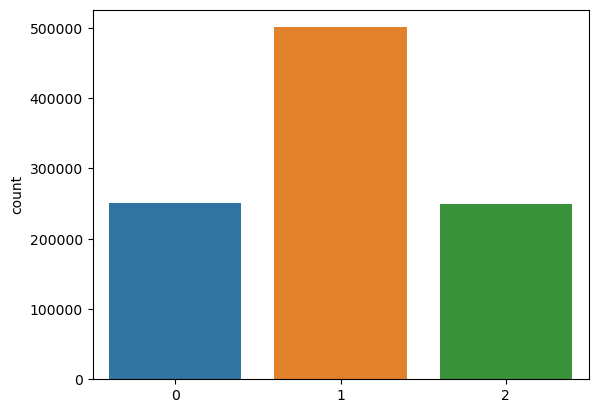

In [2]:
import seaborn as sns
sns.countplot(x=two_coin_flips)

***
# Qiskit

In this notebook, I will be using Qiskit, a library for Python created by IBM, to aid in the creation of quantum circuits. Alternatives do exist; Cirq is similar in functionality and was created by Google.

In [3]:
try:
    # Try and import qiskit
    import qiskit
except ImportError:
    # If it doesn't import, install qiskit using pip
    !pip install qiskit

***
# Qubit

A qubit short for quantum bit, analogue to a bit in classical computers,<br>
the fundamental medium for how information is transmitted in the quantum world.

When the polarisation is absolute its either 0 or 1.

$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$
$|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

## Superposition

Alternatively, the qubit can be in a state of both 0 and 1 this is
referred to as the quantum superposition.

They are commonly depicted as "bloc spheres" (as shown below)
with the north poles representing and absolute 0 and south representing 1.

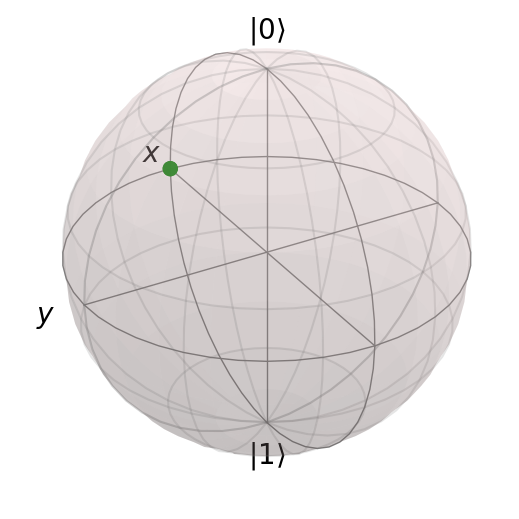

In [4]:
# Uncomment this line if you haven't qutip installed
# !pip install qutip

import qutip
import matplotlib.pyplot as plt

b = qutip.Bloch()
b.point_color = ['g']
b.point_marker = ['o']
b.point_size = [100]
b.view = [60, 30]

# Position of point on sphere
b.add_points([1, 0, 0])
b.show()

***
# Quantum logic gates

Similar to logic gates in classical computers, quantum logic gates are used to manipulate the state of the qubits.

Unlike classical computers, all quantum logic gates perform **unitary operations**

## Pauli X gate / NOT gate

The Pauli X gate also commonly known as the NOT gate,
performs a NOT operation, flipping the state of the qubit


$|0\rangle => |1\rangle$ and $|1\rangle => |0\rangle$

The operation can be represented by the following matrix


$
X =
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$

## Pauli Y gate

$
Y =
\begin{bmatrix} 0 & -i \\ -i & 0 \end{bmatrix}
$

## Pauli Z gate

$
Z =
\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$

## Hadamard gate

$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$

## CNOT gate

$
CNOT =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}
$

## SWAP gate

$
SWAP =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}
$

# Quantum Circuit

In [5]:
import qiskit

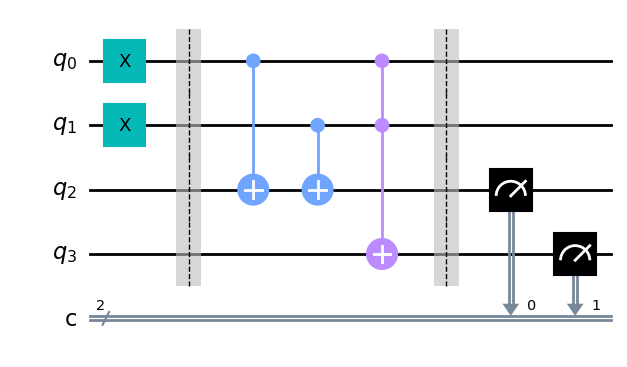

In [6]:
circuit = qiskit.QuantumCircuit(4, 2)

# The inputs will be qubits 0 and 1
circuit.x((0, 1))
circuit.barrier()

# Add Cx logic gate XOR 0 and 1 and put output into 2
circuit.cx(0, 2)
circuit.cx(1, 2)

# Add Ccx logic gate AND 0 and 1 and put output into 3
circuit.ccx(0, 1, 3)
circuit.barrier()

# Measure output
circuit.measure(2, 0) # extract XOR value
circuit.measure(3, 1) # extract AND value

circuit.draw(output="mpl")

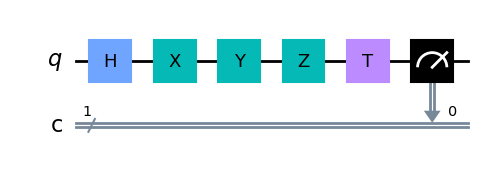

In [7]:
# Quantum circuit 1 quantum and 1 classical bit
circuit = qiskit.QuantumCircuit(1, 1)

# 1 h, z, y, z, t gates
circuit.h(0)
circuit.x(0)
circuit.y(0)
circuit.z(0)
circuit.t(0)

circuit.measure(0, 0)

circuit.draw(output="mpl")

***
# Deutsch’s Algorithm

### Generating functions dynamically

In [8]:
import random
import itertools

def generate_func(bits_count):
    max_num = (1 << bits_count)
    io_mappings = [*itertools.product([i for i in range(max_num)], repeat=max_num)]
    random_func = random.choice(io_mappings)
    return lambda x: random_func[x]

f = generate_func(1) # {0, 1}

print("f(0) = ", f(0))
print("f(1) = ", f(1))

f(0) =  1
f(1) =  1


### Python inspection magic

In [9]:
import inspect

def is_func_balanced(func):
    # Fetch the variables not local to the generated function
    nonlocals = [*inspect.getclosurevars(func).nonlocals.values()]
    # Filter by the ones that are tuples
    nonlocal_tuples = [*filter(lambda x: type(x) is tuple, nonlocals)][0]
    # If all items are unique, it can be said its balanced
    return len(nonlocal_tuples) == len(set(nonlocal_tuples))

print("Is f balanced: ", is_func_balanced(f))

f1 = generate_func(2) # {0, 1, 2, 3}
print("Is f1 balanced: ", is_func_balanced(f1))

Is f balanced:  False
Is f1 balanced:  False


### Determining if a function is balanced

In [10]:
def is_func_balanced(func, number_of_bits):
    input_set = {i for i in range(number_of_bits)}
    output_set = {func(i) for i in range(number_of_bits)}
    return input_set == output_set

number_of_bits = 2
f2 = generate_func(number_of_bits)
is_func_balanced(f2, number_of_bits)

False

***
# References
[0] <a id="quantum-notebook"></a>https://github.com/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/05-quantum-computing.ipynb<br>
[1] https://quantum-computing.ibm.com/composer/docs/iqx/guide/the-qubit<br>

https://docs.python.org/3/library/inspect.html